In [13]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 325.1 kB/s eta 0:00:34
   ---------------------------------------- 0.0/11.0 MB 326.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/11.0 MB 798.9 kB/s eta 0:00:14
    --------------------------------------- 0.3/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.0 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/11.0 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.cluster import KMeans

In [15]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


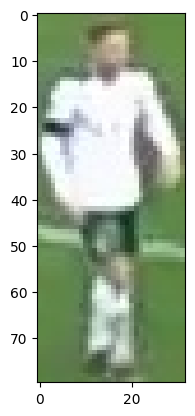

In [16]:
plt.imshow(image)
plt.show()

# Take the top half of the image


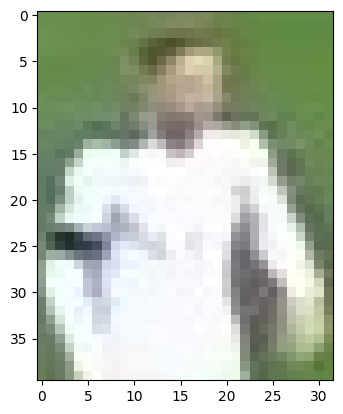

In [17]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster  the image into two clusters

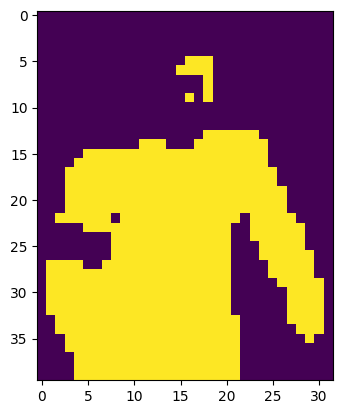

In [20]:
# Reshape the image into 2D array
image_2d = top_half_image.reshape(-1, 3)


# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels intto original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])


# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [21]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [22]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [23]:
kmeans.cluster_centers_[player_cluster]

array([235.37043478, 239.10956522, 238.62956522])